In [1]:
import sys
import os

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

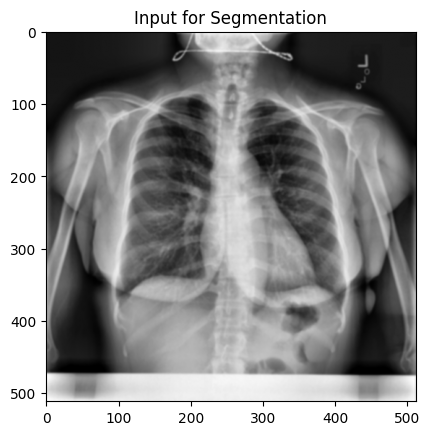

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = 'Normal-1017.png'
raw_image = cv2.imread(img_path)

if raw_image is None:
    print("Error: Image not found.")
else:
    if len(raw_image.shape) > 2:
        img_gray = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = raw_image
        
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img_gray)
    img_blur = cv2.GaussianBlur(img_clahe, (5, 5), 0)
    
    plt.imshow(img_blur, cmap='gray')
    plt.title("Input for Segmentation")
    plt.show()

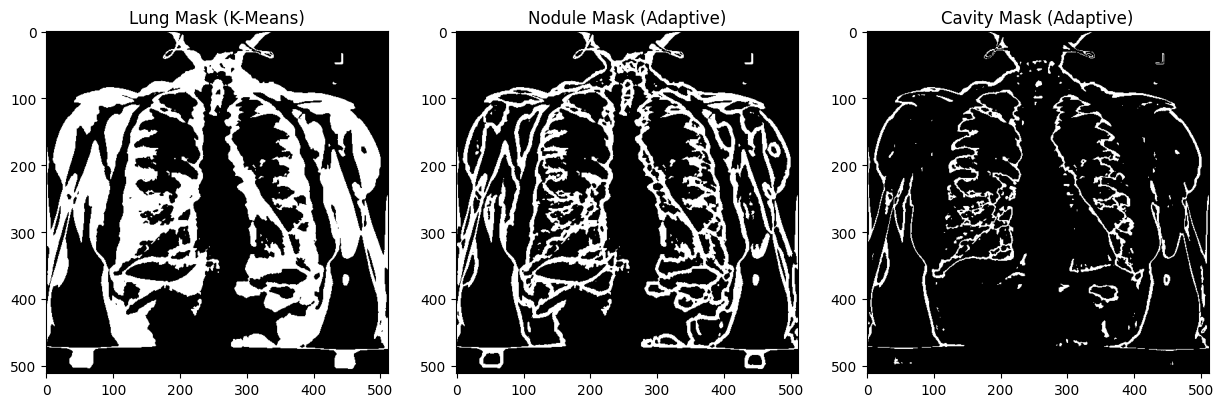

In [3]:
from src.segmentation.core import segment

masks = segment(img_blur)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(masks['lung'], cmap='gray')
plt.title("Lung Mask (K-Means)")

plt.subplot(1, 3, 2)
plt.imshow(masks['nodule'], cmap='gray')
plt.title("Nodule Mask (Adaptive)")

plt.subplot(1, 3, 3)
plt.imshow(masks['cavity'], cmap='gray')
plt.title("Cavity Mask (Adaptive)")

plt.show()